**Initial exploration of monthly data**

In [2]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

data_path = "../data/monthly/"
institutions = ["IDL", "ETH", "GERICS", "OUR"]  # JLU not yet preprocessed

In [3]:
s_dict = {}
for institution in institutions:
    print(institution)
    ds_forest = xr.open_dataset(data_path + "FOREST/S_" + institution + ".nc")
    ds_grass = xr.open_dataset(data_path + "GRASS/S_" + institution + ".nc")
    s_dict[institution] = xr.concat([ds_forest, ds_grass], pd.Index(["FOREST", "GRASS"], name="experiment"))

IDL
ETH
GERICS
OUR


In [4]:
vertical_dim_dic = {"IDL": "mlev", "ETH": "pressure", "GERICS": "lev", "OUR": "plev"}
# s_dict["IDL"]: mlev
# s_dict["ETH"]: pressure
# s_dict["GERICS"]: lev
# s_dict["OUR"]: plev

### Full domain

IDL
ETH
GERICS
OUR


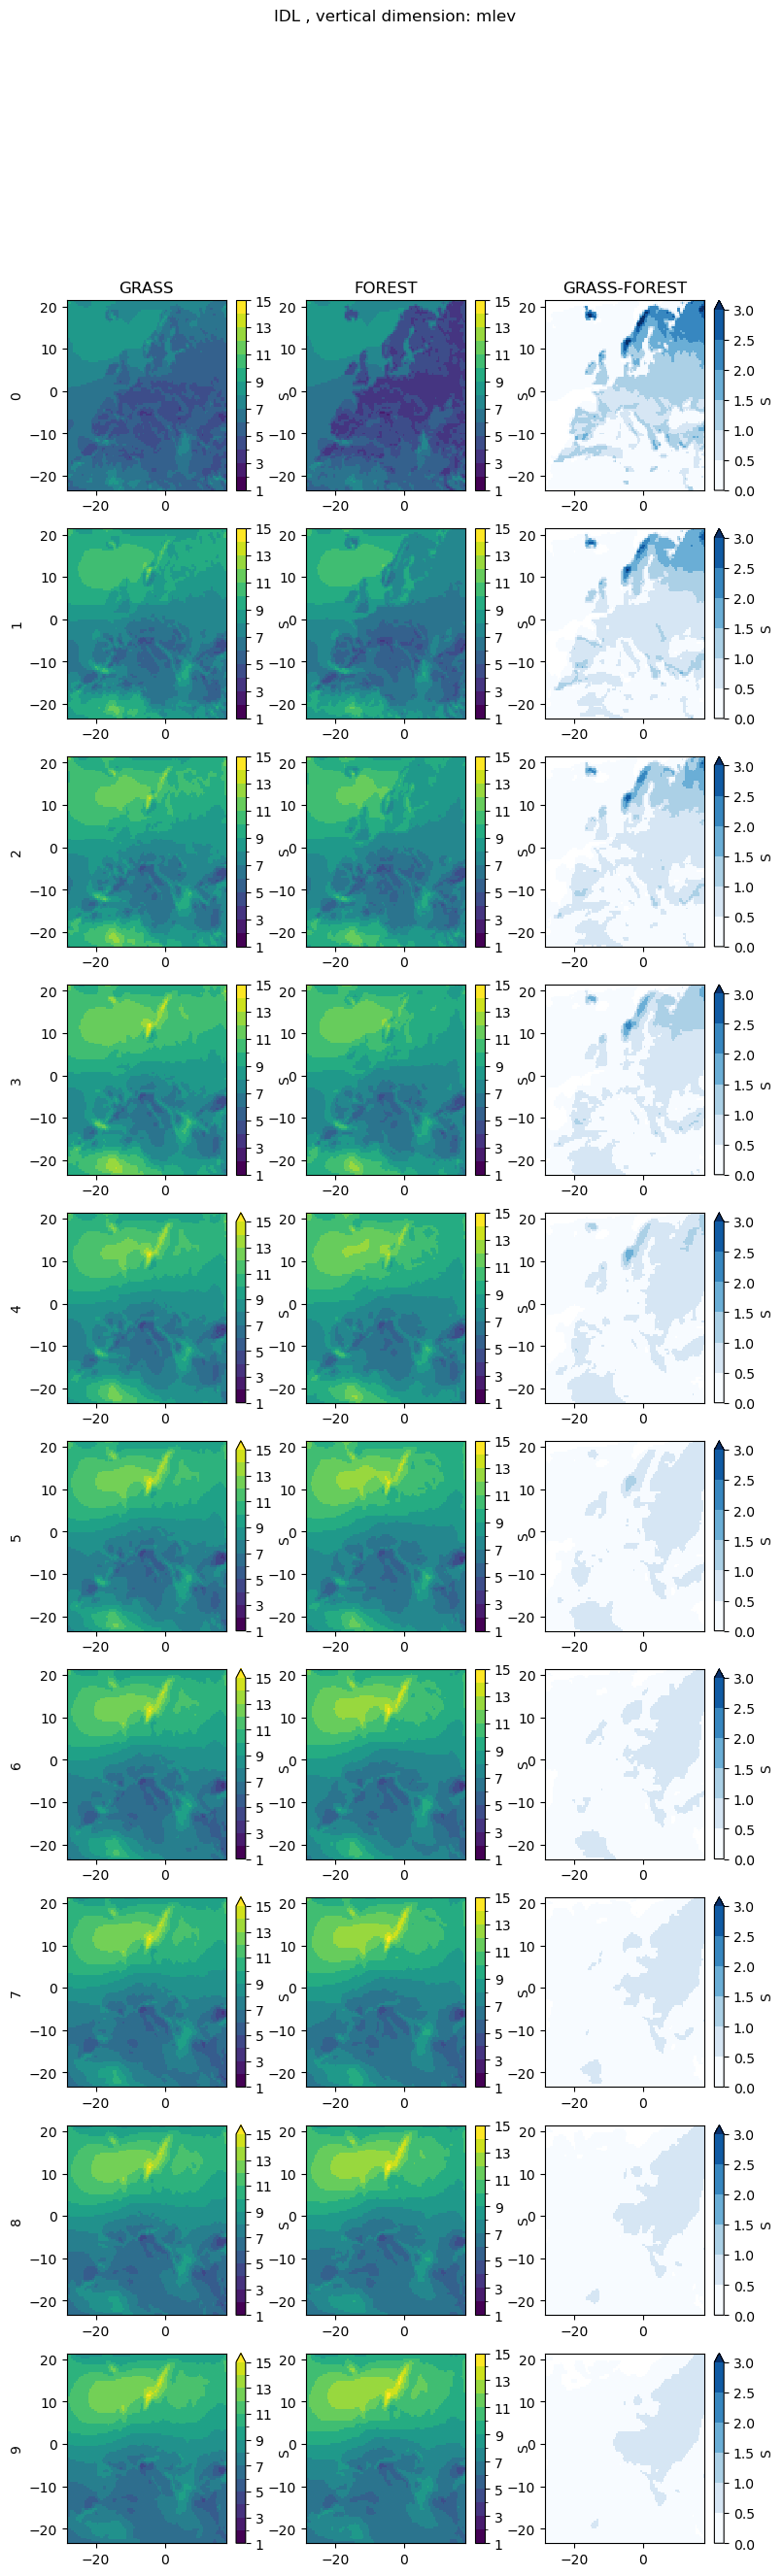

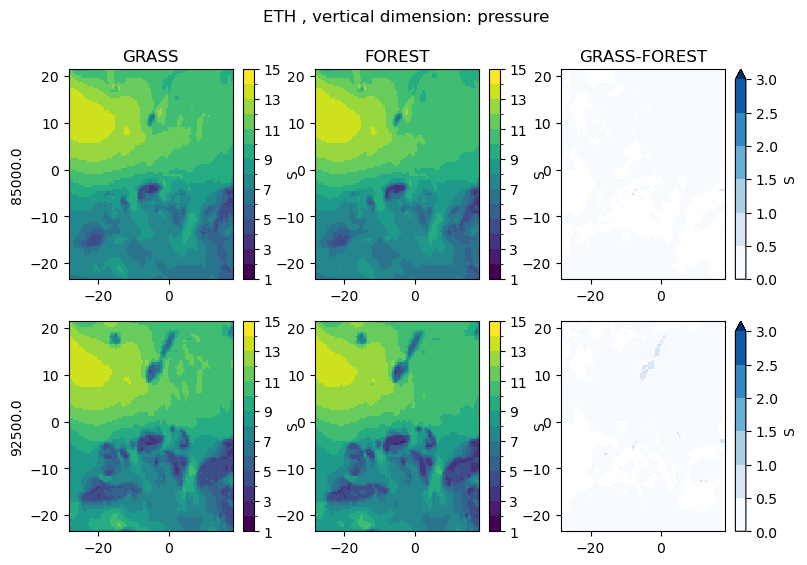

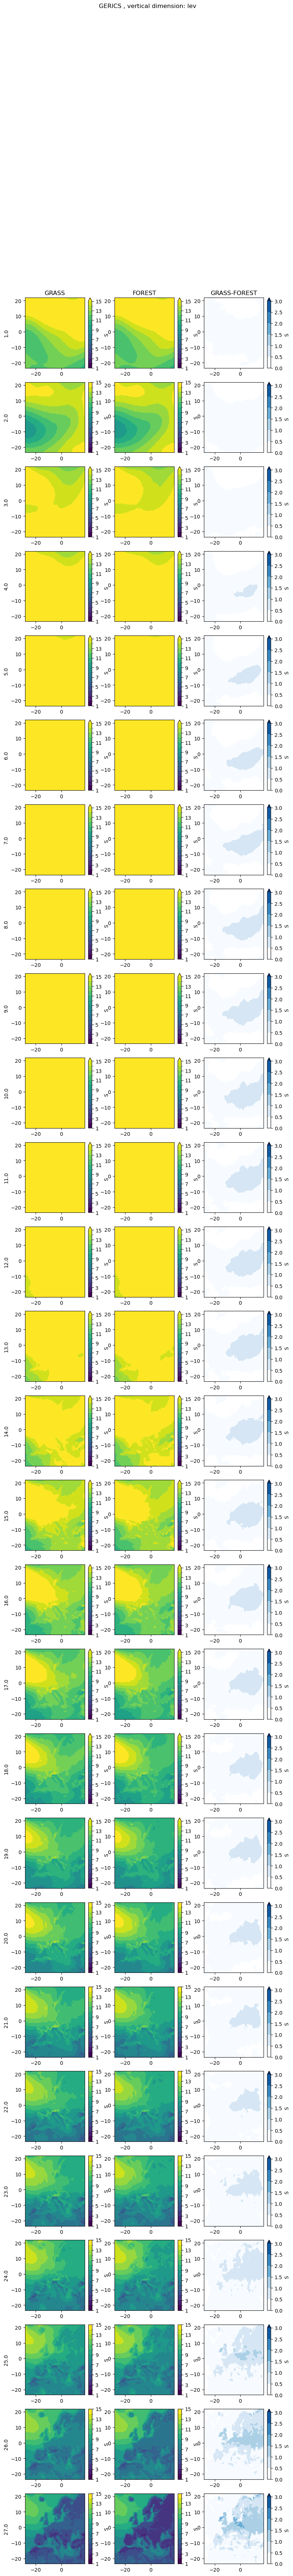

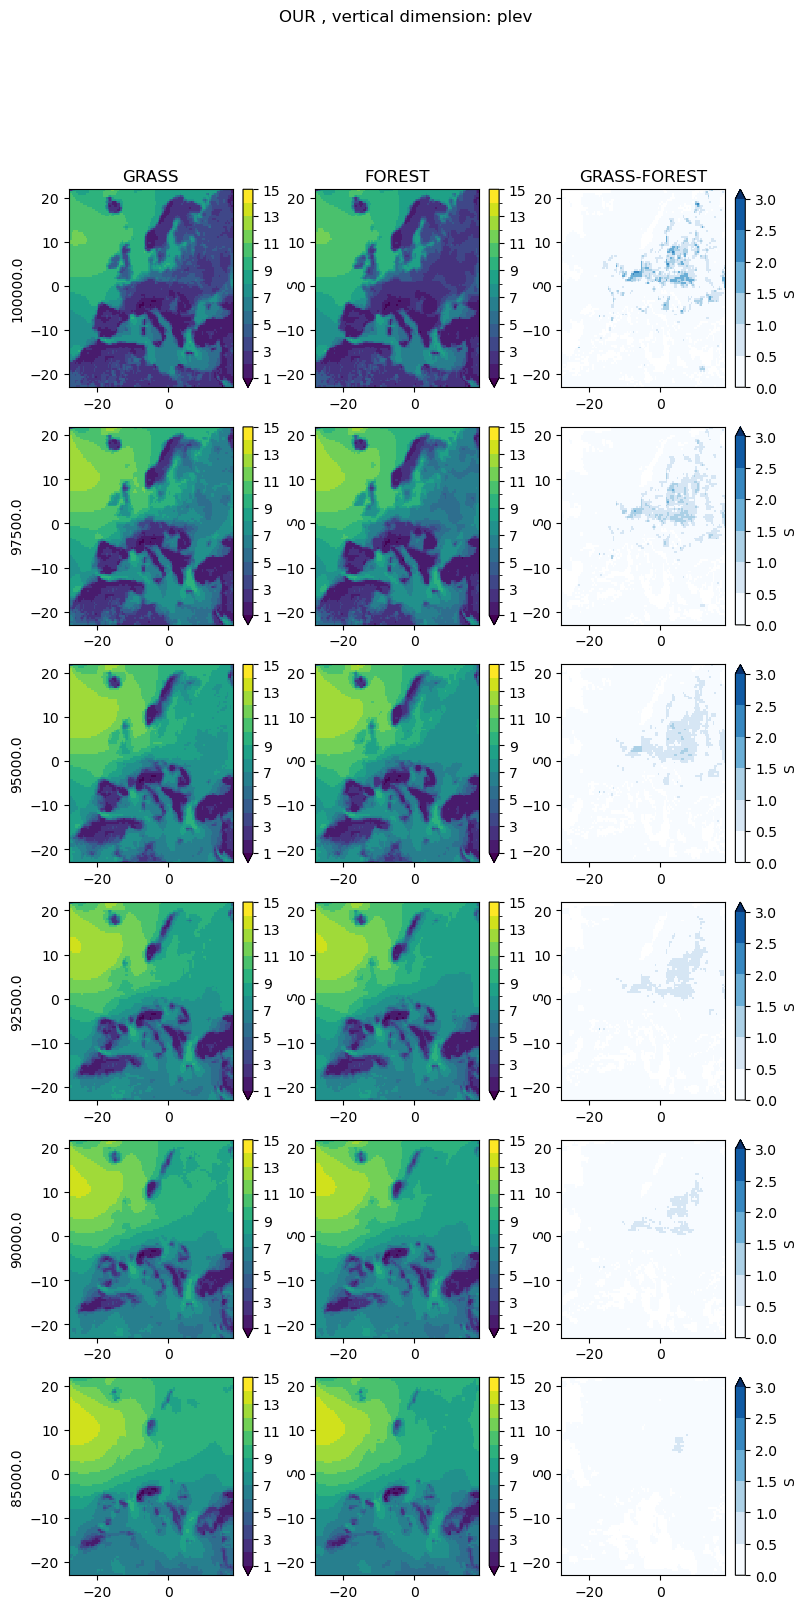

In [74]:
for ins in institutions:
    print(ins)
    vertical_dim = vertical_dim_dic[ins]
    N_vertical = s_dict[ins][vertical_dim].size
    f, ax = plt.subplots(N_vertical, 3, figsize=((9, N_vertical * 3)))

    plt.suptitle(ins + " , vertical dimension: " + vertical_dim)
    for N in range(N_vertical):
        s_GRASS = s_dict[ins].isel({vertical_dim: N}).sel({"experiment": "GRASS"})["S"].mean("time")
        s_GRASS.plot(ax=ax[N,0], levels=15, vmin=1, vmax=15)
        s_FOREST = s_dict[ins].isel({vertical_dim: N}).sel({"experiment": "FOREST"})["S"].mean("time")
        s_FOREST.plot(ax=ax[N,1], levels=15, vmin=1, vmax=15)
        s_diff = s_GRASS - s_FOREST
        s_diff.plot(ax=ax[N,2], levels=7, vmin=0, vmax=3, extend="max", cmap="Blues")
        if ins != "IDL":
            ax[N,0].set_ylabel(str(s_GRASS[vertical_dim].values))
        else:
            ax[N,0].set_ylabel(str(N))  # this is IDL which only counts its levels
        ax[N, 1].set_ylabel("")
        ax[N, 2].set_ylabel("")
    for ax_tmp in ax.flatten():
        ax_tmp.set_xlabel("")
        #ax_tmp.set_ylabel("")
        ax_tmp.set_title("")
    ax[0,0].set_title("GRASS")    
    ax[0,1].set_title("FOREST")    
    ax[0,2].set_title("GRASS-FOREST")    
    plt.savefig("../plots/exploration/absolute_differences/Diff_maps_" + ins + ".jpeg", dpi=300)

### Iceland

IDL
ETH
GERICS
OUR


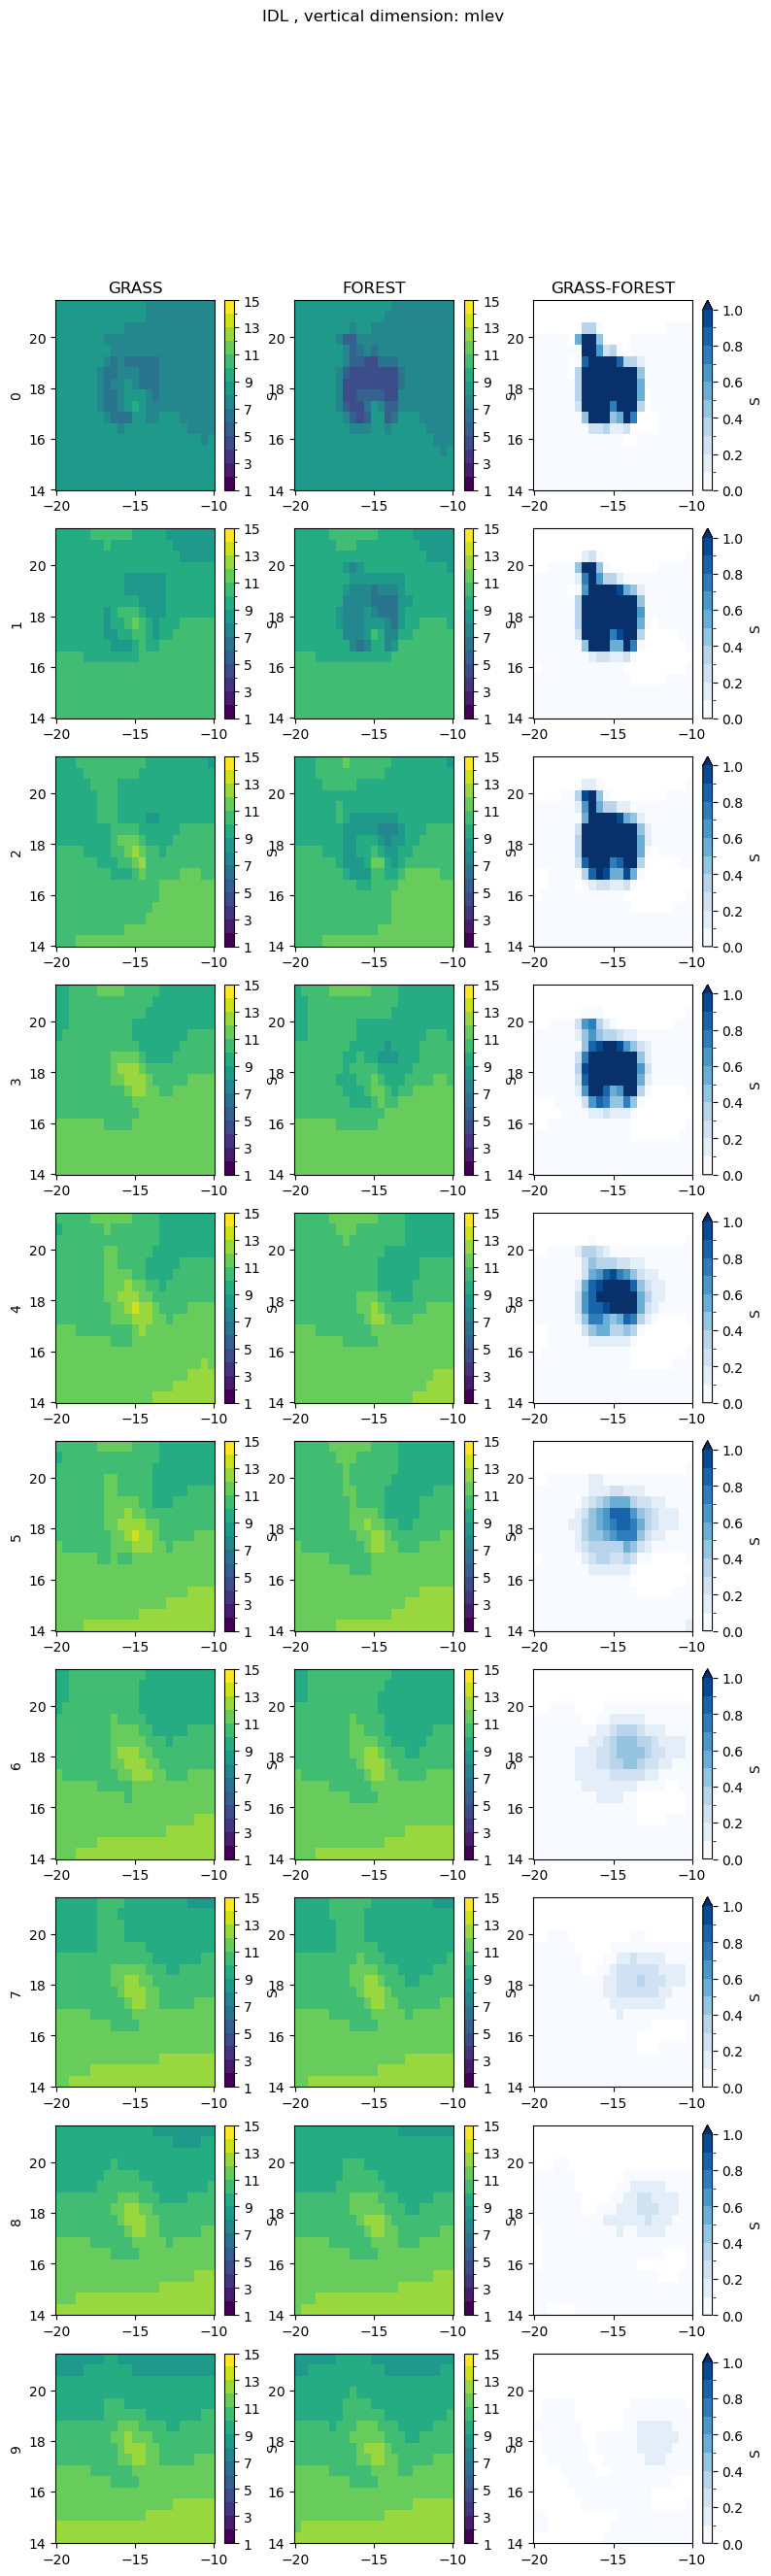

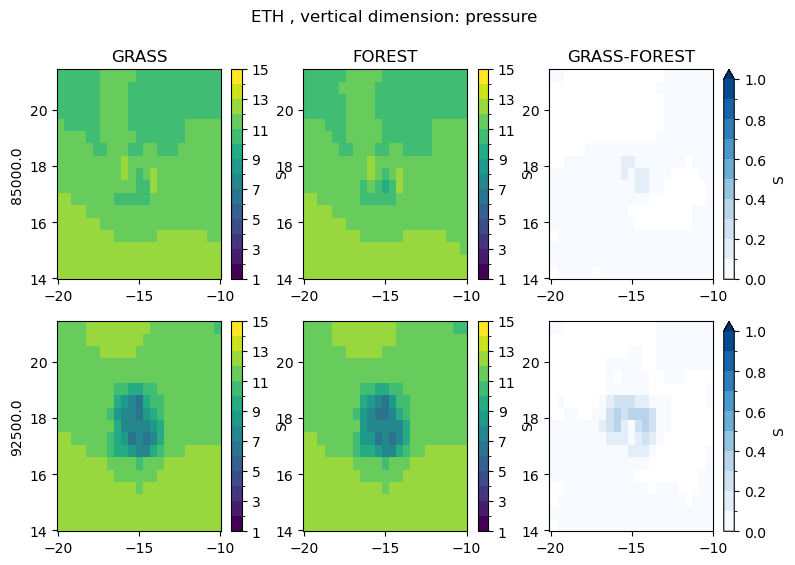

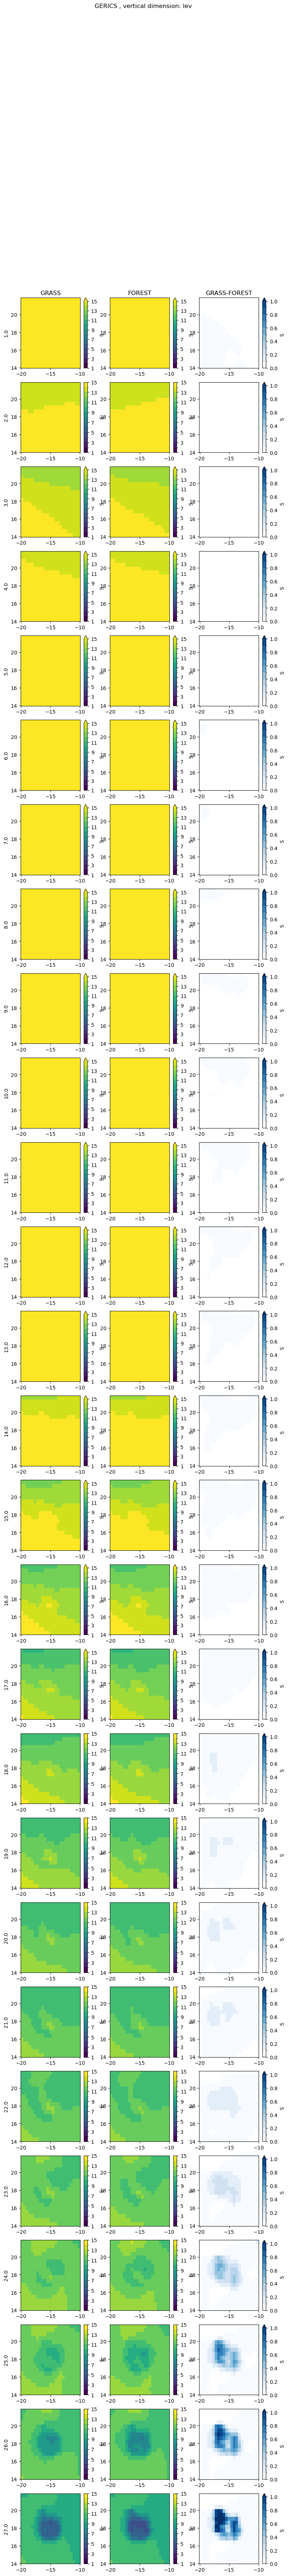

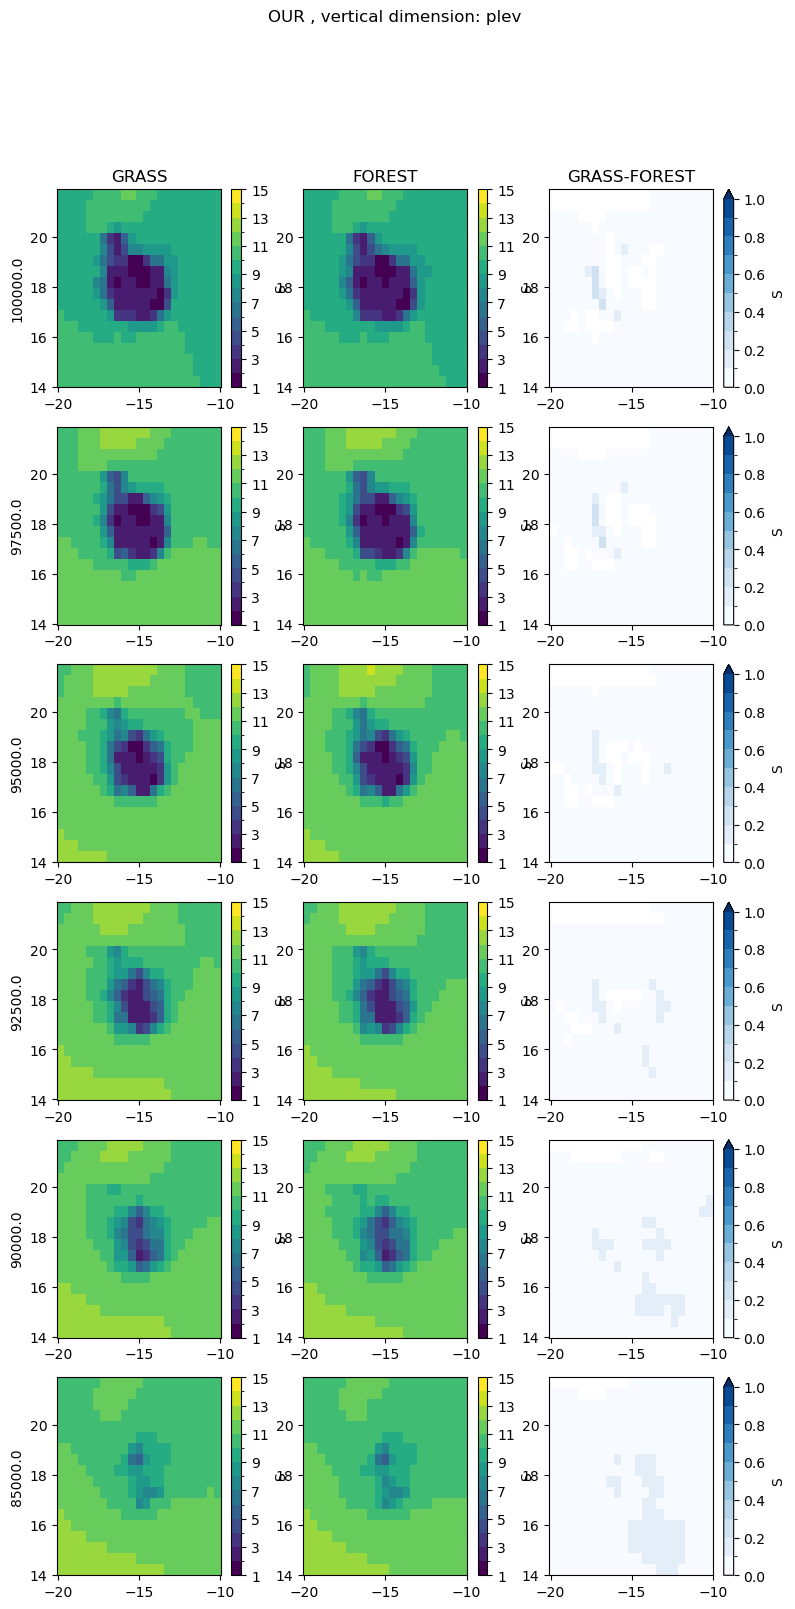

In [10]:
# only for Iceland and surrounding sea

def crop_iceland(ds):
    return ds.sel({"rlat": slice(14, 23), "rlon": slice(-20,-10)})

for ins in institutions:
    print(ins)

    
    vertical_dim = vertical_dim_dic[ins]
    N_vertical = s_dict[ins][vertical_dim].size
    f, ax = plt.subplots(N_vertical, 3, figsize=((9, N_vertical * 3)))

    plt.suptitle(ins + " , vertical dimension: " + vertical_dim)
    for N in range(N_vertical):
        s_GRASS = s_dict[ins].isel({vertical_dim: N}).sel({"experiment": "GRASS"})["S"].mean("time")
        s_GRASS = crop_iceland(s_GRASS)
        s_GRASS.plot(ax=ax[N,0], levels=15, vmin=1, vmax=15)
        s_FOREST = s_dict[ins].isel({vertical_dim: N}).sel({"experiment": "FOREST"})["S"].mean("time")
        s_FOREST = crop_iceland(s_FOREST)
        s_FOREST.plot(ax=ax[N,1], levels=15, vmin=1, vmax=15)
        s_diff = s_GRASS - s_FOREST
        s_diff.plot(ax=ax[N,2], levels=11, vmin=0, vmax=1, extend="max", cmap="Blues")
        if ins != "IDL":
            ax[N,0].set_ylabel(str(s_GRASS[vertical_dim].values))
        else:
            ax[N,0].set_ylabel(str(N))  # this is IDL which only counts its levels
        ax[N, 1].set_ylabel("")
        ax[N, 2].set_ylabel("")
    for ax_tmp in ax.flatten():
        ax_tmp.set_xlabel("")
        #ax_tmp.set_ylabel("")
        ax_tmp.set_title("")
    ax[0,0].set_title("GRASS")    
    ax[0,1].set_title("FOREST")    
    ax[0,2].set_title("GRASS-FOREST")    
    plt.savefig("../plots/exploration/absolute_differences/Iceland_Diff_maps_" + ins + ".jpeg", dpi=300)
